# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os
import csv
import time

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
temp = []
lat = []
lng = []
name = []
country = []
humidity = []
cloudiness = []
windspeed = []

record_count = 0
print("Beginning Data Retrieval")
print("------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    record_count = ((record_count) + 1)
    try:
        print(f"Processing Record {record_count} of {len(cities)} | {city}")
        query_url = url + "appid=" + weather_api_key + "&q=" + (city) + "&units=imperial"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        temp.append(weather_json["main"]["temp_max"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        name.append(weather_json["name"])
        country.append(weather_json["sys"]["country"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        windspeed.append(weather_json["wind"]["speed"])
        #dt.append(weather_json["dt"])
        time.sleep(1) 
        
    except:
        print(f"{city} not found, skipping...")
          
        
        

Beginning Data Retrieval
------------------------
Processing Record 1 of 603 | vaitupu
vaitupu not found, skipping...
Processing Record 2 of 603 | clyde river
Processing Record 3 of 603 | salamanca
Processing Record 4 of 603 | antofagasta
Processing Record 5 of 603 | mar del plata
Processing Record 6 of 603 | srednekolymsk
Processing Record 7 of 603 | ribeira grande
Processing Record 8 of 603 | port alfred
Processing Record 9 of 603 | avarua
Processing Record 10 of 603 | geraldton
Processing Record 11 of 603 | albany
Processing Record 12 of 603 | busselton
Processing Record 13 of 603 | gat
Processing Record 14 of 603 | grand centre
grand centre not found, skipping...
Processing Record 15 of 603 | chaman
Processing Record 16 of 603 | ahmadpur
Processing Record 17 of 603 | samusu
samusu not found, skipping...
Processing Record 18 of 603 | muros
Processing Record 19 of 603 | soligalich
Processing Record 20 of 603 | hithadhoo
Processing Record 21 of 603 | mantua
Processing Record 22 of 603

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_dict = {"City": name,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": windspeed,
                "Country": country,
                                
}



In [20]:
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('Weather_Data.csv', index=False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Clyde River,70.47,-68.59,42.84,76,0,5.32,CA
1,Salamanca,40.83,-6.00,72.00,68,82,6.93,ES
2,Antofagasta,-23.65,-70.40,55.40,76,90,2.24,CL
3,Mar del Plata,-38.00,-57.56,42.80,56,52,11.41,AR
4,Srednekolymsk,67.45,153.68,71.53,41,0,7.25,RU
...,...,...,...,...,...,...,...,...
551,Alofi,-19.06,-169.92,73.40,94,57,16.11,NU
552,Port-Gentil,-0.72,8.78,77.00,88,75,12.48,GA
553,Bonthe,7.53,-12.51,75.13,91,100,11.43,SL
554,Pop,40.87,71.11,91.40,24,20,6.93,UZ


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
over_100 = weather_df.loc[weather_df["Humidity"] > 100,:]
print(over_100)
#No Cities with Humidity over 100%

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country]
Index: []


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

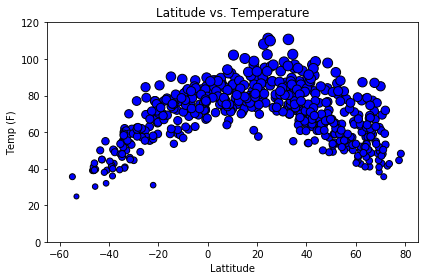

In [149]:
data_1_scatter = weather_df["Lat"]
data_2_scatter = weather_df["Max Temp"]
data_3_scatter = weather_df["Humidity"]
data_4_scatter = weather_df["Cloudiness"]
data_5_scatter = weather_df["Wind Speed"]

plt.scatter(data_1_scatter, data_2_scatter, marker="o", facecolors="blue", edgecolors="black", alpha=1,s=data_2_scatter)
plt.title("Latitude vs. Temperature")
plt.xlabel("Lattitude")
plt.ylabel("Temp (F)");
plt.ylim(0,120)
plt.xlim(-65,85)
plt.tight_layout()
plt.savefig('Latitude vs. Temperature.png')

## Latitude vs. Humidity Plot

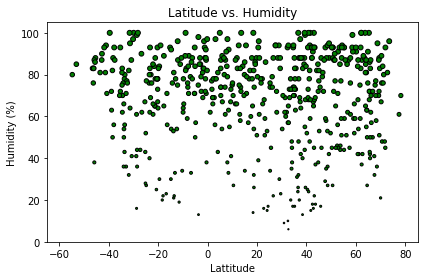

In [150]:
plt.scatter(data_1_scatter, data_3_scatter, marker=".", facecolors="green", edgecolors="black", alpha=1,s=data_3_scatter)
plt.title("Latitude vs. Humidity")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)");
plt.ylim(0,105)
plt.xlim(-65,85)
plt.tight_layout()
plt.savefig('Latitude vs. Humidity.png')

## Latitude vs. Cloudiness Plot

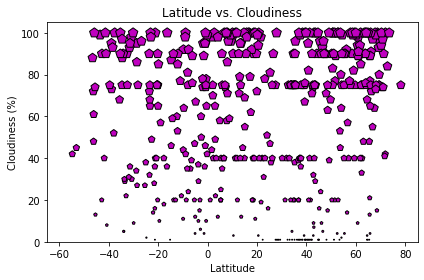

In [152]:
plt.scatter(data_1_scatter, data_4_scatter, marker="p", facecolors="m", edgecolors="black", alpha=1,s=data_4_scatter)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)");
plt.ylim(0,105)
plt.xlim(-65,85)
plt.tight_layout()
plt.savefig('Latitude vs. Cloudiness.png')

## Latitude vs. Wind Speed Plot

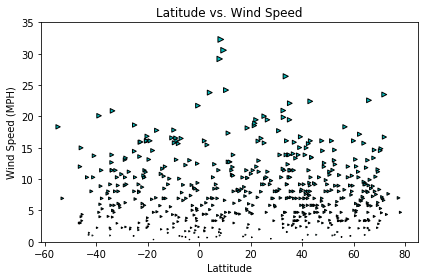

In [153]:
plt.scatter(data_1_scatter, data_5_scatter, marker=">", facecolors="c", edgecolors="black", alpha=1,s=data_5_scatter)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (MPH)");
plt.ylim(0,35)
#plt.xlim(-65,85)
plt.tight_layout()
plt.savefig('Latitude vs. Wind Speed.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [86]:
# Create Northern and Southern Hemisphere DataFrames

#Calculate is Northen or Southen Hemisphere


weather_df["Hemisphere"] = ""


for row in weather_df:
    weather_df.loc[weather_df["Lat"] >0, 'Hemisphere'] = 'North'
    weather_df.loc[weather_df["Lat"] <=0, 'Hemisphere'] = 'South'

north_weather = weather_df.set_index("Hemisphere")
north_weather = north_weather.drop(["South"], axis=0)
north_weather = north_weather.reset_index(drop=False)

south_weather = weather_df.set_index("Hemisphere")
south_weather = south_weather.drop(["North"], axis=0)
south_weather = south_weather.reset_index(drop=False)

,Hemisphere,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,North,Clyde River,70.47,-68.59,42.84,76,0,5.32,CA
1,North,Salamanca,40.83,-6.00,72.00,68,82,6.93,ES
2,North,Srednekolymsk,67.45,153.68,71.53,41,0,7.25,RU
3,North,Ribeira Grande,38.52,-28.70,69.80,83,75,13.87,PT
4,North,Albany,42.60,-73.97,73.99,91,74,7.52,US
...,...,...,...,...,...,...,...,...,...
372,North,Ghugus,19.93,79.13,93.22,51,72,7.85,IN
373,North,Laas,46.62,10.70,50.00,81,5,10.29,IT
374,North,Bonthe,7.53,-12.51,75.13,91,100,11.43,SL
375,North,Pop,40.87,71.11,91.40,24,20,6.93,UZ


In [90]:
data_1_scatter_n = north_weather["Lat"]
data_2_scatter_n = north_weather["Max Temp"]
data_3_scatter_n = north_weather["Humidity"]
data_4_scatter_n = north_weather["Cloudiness"]
data_5_scatter_n = north_weather["Wind Speed"]
data_1_scatter_s = south_weather["Lat"]
data_2_scatter_s = south_weather["Max Temp"]
data_3_scatter_s = south_weather["Humidity"]
data_4_scatter_s = south_weather["Cloudiness"]
data_5_scatter_s = south_weather["Wind Speed"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

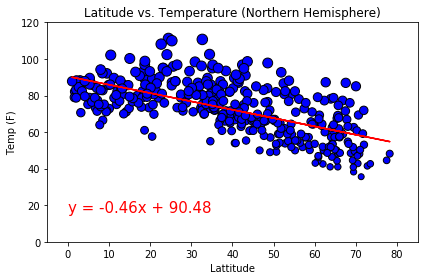

In [155]:
x_values = data_1_scatter_n
y_values = data_2_scatter_n
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=1,s=y_values)
plt.title("Latitude vs. Temperature (Northern Hemisphere)")
plt.xlabel("Lattitude")
plt.ylabel("Temp (F)");
plt.annotate(line_eq,(0,16),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.ylim(0,120)
plt.xlim(-5,85)
plt.tight_layout()
plt.savefig('Latitude vs. Temperature North.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

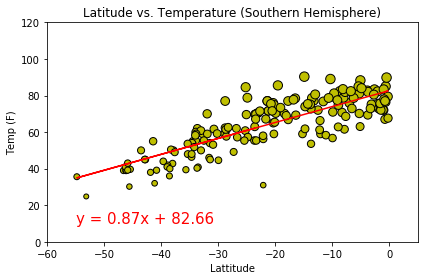

In [157]:
x_values = data_1_scatter_s
y_values = data_2_scatter_s
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, marker="o", facecolors="y", edgecolors="black", alpha=1,s=y_values)
plt.title("Latitude vs. Temperature (Southern Hemisphere)")
plt.xlabel("Lattitude")
plt.ylabel("Temp (F)");
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.ylim(0,120)
plt.xlim(-60,5)
plt.tight_layout()
plt.savefig('Latitude vs. Temperature South.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

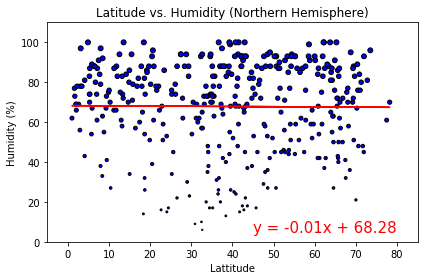

In [158]:
x_values = data_1_scatter_n
y_values = data_3_scatter_n
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=1,s=y_values)
plt.title("Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)");
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.ylim(0,110)
plt.xlim(-5,85)
plt.tight_layout()
plt.savefig('Latitude vs. Humidity North.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

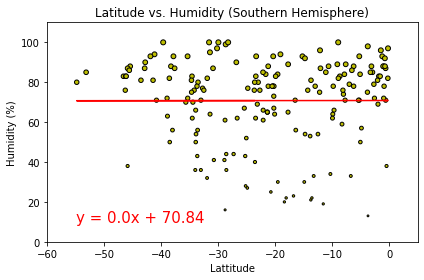

In [160]:
x_values = data_1_scatter_s
y_values = data_3_scatter_s
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, marker=".", facecolors="y", edgecolors="black", alpha=1,s=y_values)
plt.title("Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)");
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.ylim(0,110)
plt.xlim(-60,5)
plt.tight_layout()
plt.savefig('Latitude vs. Humidity South.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

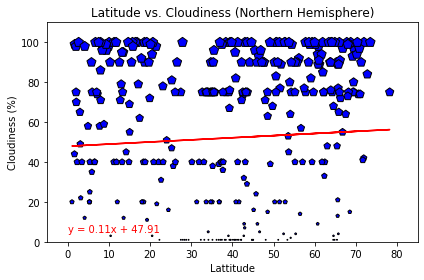

In [161]:
x_values = data_1_scatter_n
y_values = data_4_scatter_n
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, marker="p", facecolors="blue", edgecolors="black", alpha=1,s=y_values)
plt.title("Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)");
plt.annotate(line_eq,(0,5),fontsize=10,color="red")
plt.plot(x_values,regress_values,"r-")
plt.ylim(0,110)
plt.xlim(-5,85)
plt.tight_layout()
plt.savefig('Latitude vs. Cloudiness North.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

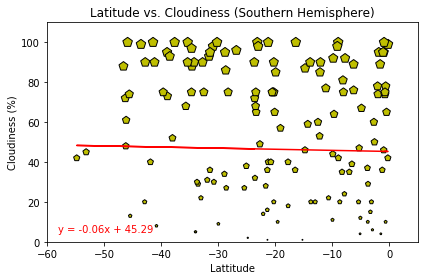

In [162]:
x_values = data_1_scatter_s
y_values = data_4_scatter_s
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, marker="p", facecolors="y", edgecolors="black", alpha=1,s=y_values)
plt.title("Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)");
plt.annotate(line_eq,(-58,5),fontsize=10,color="red")
plt.plot(x_values,regress_values,"r-")
plt.ylim(0,110)
plt.xlim(-60,5)
plt.tight_layout()
plt.savefig('Latitude vs. Cloudiness South.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

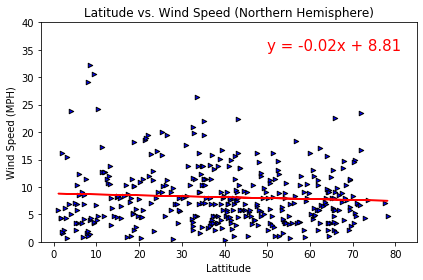

In [163]:
x_values = data_1_scatter_n
y_values = data_5_scatter_n
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, marker=">", facecolors="blue", edgecolors="black", alpha=1,s=20)
plt.title("Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (MPH)");
plt.annotate(line_eq,(50,35),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.ylim(0,40)
plt.xlim(-3,85)
plt.tight_layout()
plt.savefig('Latitude vs. Wind Speed North.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

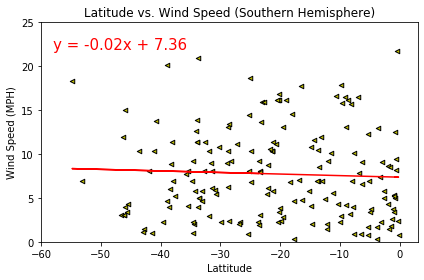

In [164]:
x_values = data_1_scatter_s
y_values = data_5_scatter_s
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, marker="<", facecolors="y", edgecolors="black", alpha=1,s=20)
plt.title("Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (MPH)");
plt.annotate(line_eq,(-58,22),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.ylim(0,25)
plt.xlim(-60,3)
plt.tight_layout()
plt.savefig('Latitude vs. Wind Speed South.png')